# Assignment 1

### Table of contents

    Importing libraries
    Particle class
    Collision class
    Model 
    Task 1
    Task 2 
    Task 3 
    Task 4

In [1]:
import matplotlib.pyplot as plt
from system_class import*
from particle_classes import*
from matplotlib.patches import Rectangle
from scipy import optimize

##### Initial Conditions

Since the Boltzmann distribution assumes an ideal gass, the simulations in this project will make the same assumptions. Therefor the ideal gass law is used in the calculations.

In [2]:
mean_velocity = 461.3          #Mean velocity of oxygen at room temperature
mu = 1.66 * 10**(-27)          #Atomic weight
m_02 =2*16*mu                     #Weight of an oxygen atom
mol =  6.0221415 * 10**(23)

#The Gass is a Van der Waals gass
a = 1.382
b = 0.03186
R = 8.3144626181532

r_02 = 152*10**(-12)            #Radius of an oxygen atom
k = 1.38 * 10**(-23)       #Boltzmanns constant
T = 273 + 20                   #Kelvin at roomtemperature
P = 101325                     #atm

##### Functions

In [3]:

def evolution(system_1,times=1):
    x_list = []
    y_list = []
    vx_list = []
    vy_list = []
    for i in range(4):
        x = []
        y = []
        vx = []
        vy = []
        for p in system_1.particles:  
            x.append(p.position.x)
            y.append(p.position.y)
            vx.append(p.velocity.vx)
            vy.append(p.velocity.vy)

        x_list.append(x)
        y_list.append(y)
        vx_list.append(vx)
        vy_list.append(vy)

        system_1.update(times)
    return x_list,y_list,vx_list,vy_list
def boltsmann(v, m):
    return m*v/k / T * np.exp(- m* v**2 / 2 / k / T)
def Boltzmann_comparison(vel_start, vel_end,v, m = m_02):
    '''
    Input:
    vel_start: array with the initial velocity of all the particles.
    vel_end:   array with all the final velocities of the particles
    v: velocity distribution we are calculating the boltsmann distribution over

    Output: 
    Figure comparing the three distributions.
    '''

    f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

    counts, bins = np.histogram(vel_start)
    ax1.stairs(counts, bins)
    ax1.set_title("Plot of the velocity at the beginning")

    counts, bins = np.histogram(vel_end)
    ax2.stairs(counts, bins)
    ax2.set_title("Velocity at the end")

    ax3.plot(v,boltsmann(v, m))
    ax3.set_title("Plot of the Boltsmanns Distribution")
    return f


def plotting_evolution(x_list,y_list,vx_list,vy_list):
    fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (10,10))
    fig.suptitle('Particle evolution')

    r =1
    s =1
    ax1.scatter(x_list[0], y_list[0], s =r )
    ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
    ax1.quiver(x_list[0], y_list[0], vx_list[0], vy_list[0], scale=s)
    ax1.grid()

    ax2.scatter(x_list[1], y_list[1],s =r)
    ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
    ax2.quiver(x_list[1], y_list[1], vx_list[1], vy_list[1], scale=s)
    ax2.grid()

    ax3.scatter(x_list[2], y_list[2],s =r)
    ax3.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
    ax3.quiver(x_list[2], y_list[2], vx_list[2], vy_list[2], scale=s)
    ax3.grid()

    ax4.scatter(x_list[3], y_list[3],s =r)
    ax4.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
    ax4.quiver(x_list[3], y_list[3], vx_list[3], vy_list[3], scale=s)
    ax4.grid()

    return fig

def E(v,m):return m*v**2/2

def Calculating_the_energy(system, number_of_updates, d_collision = 0.001):
    '''
    Input: 
    system: The system we are calculated 
    number_of_updates: 
    d_collision: 

    Output: 


    '''
    vel_m0 = np.zeros((int(system.num_particles/2), number_of_updates))
    vel_4m0 = np.zeros((int(system.num_particles/2), number_of_updates))

    vel = system.return_velocities()
    vel_m0[:,0]=vel[:int(system.num_particles/2)]
    vel_4m0[:,0]=vel[int(system.num_particles/2):]

    average_current = system.average_particle_collision
    average_next = average_current 
    j = 1
    while system.average_particle_collision < 10 and j < number_of_updates:
        while average_next-average_current < d_collision: 
            system.update_step()
            average_next = system.average_particle_collision
        average_current = average_next

        vel = system.return_velocities()
        vel_m0[:,j]=vel[:int(system.num_particles/2)]
        vel_4m0[:,j]=vel[int(system.num_particles/2):]
        j +=1 
    return vel_m0, vel_4m0
def plot_kinetic_energy(vel_m0,vel_4m0):
    fig = plt.figure(figsize = (10,5))
    gs = fig.add_gridspec(1, 3, wspace=0)
    (ax1, ax2, ax3) = gs.subplots(sharey=True)
    ax1.plot(E(vel_m0,m_02).sum(axis = 0))
    ax1.set_title("Ek when m = m0")

    ax2.plot(E(vel_4m0,4*m_02).sum(axis = 0))
    ax2.set_title("Ek when m = 4m0")

    ax3.plot(E(vel_4m0,4*m_02).sum(axis = 0)+E(vel_m0,m_02).sum(axis = 0))
    ax3.set_title("Ek for all m")
    fig.suptitle("The average kinetic energy with elaticity 1")
    return fig


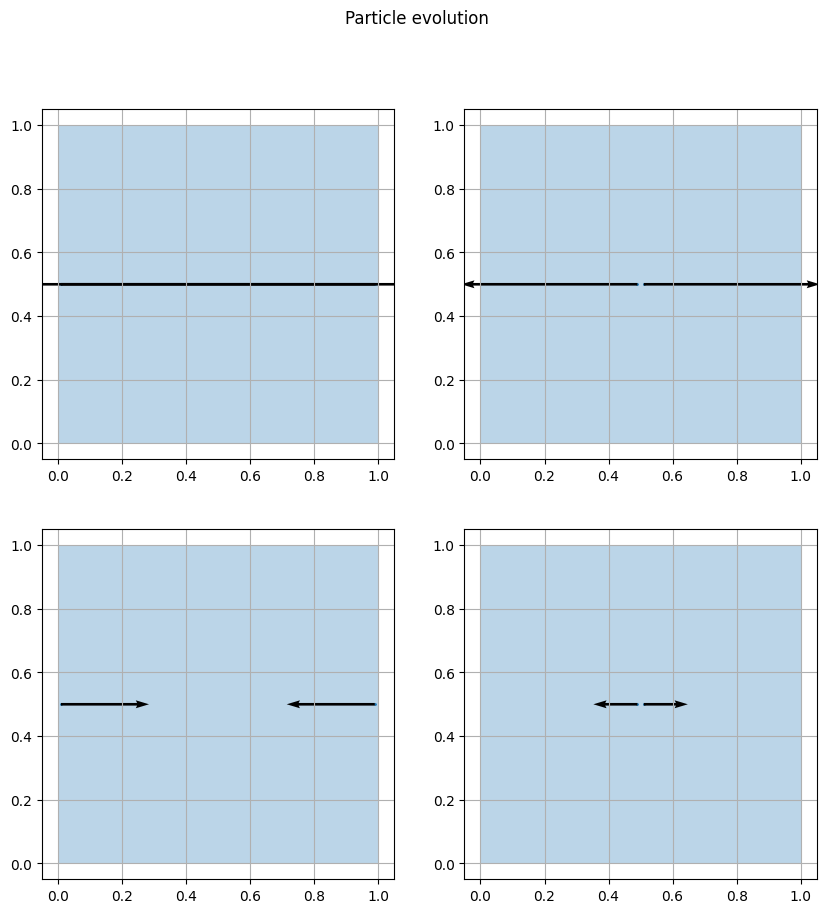

In [4]:
num_particles = 2
elasticity= 0.5
x_boundaries = 1
y_boundaries = 1
mean_velocity = 0.5
mass=[1]
radius=[.001]
tc = 0

system_1 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)

p1 = particle(position(0.01,0.5), velocity(1,0), 0.01, 1)
p2 = particle(position(0.99,0.5), velocity(-1,0), 0.01, 1)

system_1.particles.append(p1)
system_1.particles.append(p2)
for p in system_1.particles: 
    system_1.find_collisions_particle(p)

x_list,y_list,vx_list,vy_list = evolution(system_1,1)


fig_debug = plotting_evolution(x_list,y_list,vx_list,vy_list)
plt.show()

**Task 1**

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [5]:
# Initial Conditions
num_particles =1000
n = num_particles/mol
def van(V): return  (P + a * n**2 / V**2)*( V-n*b) - n*R*T 

sol = optimize.root(van, 10**(-10), method='krylov')
x_b = y_b =  sol.x**(1/3)  #Box boundaries given in meters
mass = [m_02]
radius = [r_02]

system_1 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)    # Initializing the system
system_1.uniform_particles()                                                           # Putting the particles in the box with a uniform distribution
system_1.find_collisions()                                                             # Finding the collisions and adding them to a heapqueu                                         



IndexError: invalid index to scalar variable.

In [ ]:
vel_start = system_1.return_velocities()
times = 10000
system_1.update(times)
vel_end = system_1.return_velocities()

In the three histograms below we see the initial speed distribution, the speed distribution after the system has reached equilibrium and the D Maxwell-Boltzmann distribution.

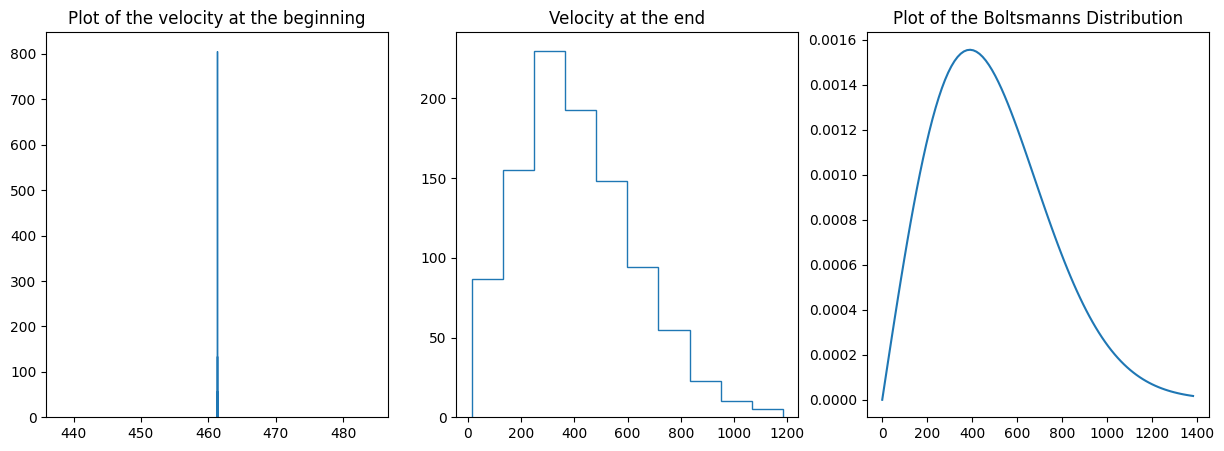

In [ ]:
figure_1 = Boltzmann_comparison(vel_start, vel_end, np.linspace(0,mean_velocity*3,100) )
plt.show()

**Task 2** 

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [ ]:
# Initial Conditions
num_particles =4000
n = num_particles/mol

def van(V):  return (P + a * n**2 / V**2)*( V-n*b) - n*R*T 

sol = optimize.root(van, 10**(-10), method='krylov')
x_b = y_b =  sol.x**(1/3)  #Box boundaries given in meters
mass = [m_02, 4*m_02]
radius = [r_02]

system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)
system_2.uniform_particles()
system_2.find_collisions()


TypeError: unhashable type: 'list'

In [ ]:
vel_start_2 = system_2.return_velocities()
times = 4000
system_2.update(times)
vel_end_2 = system_2.return_velocities()

In [ ]:
vel_start_m0 = vel_start_2[:int(system_2.num_particles/2)]
vel_start_4m0 = vel_start_2[int(system_2.num_particles/2):]

vel_end_m0 = vel_end_2[:int(system_2.num_particles/2)]
vel_end_4m0 = vel_end_2[int(system_2.num_particles/2):]

##### Velocity distribution of the particles with mass equal to m0. 

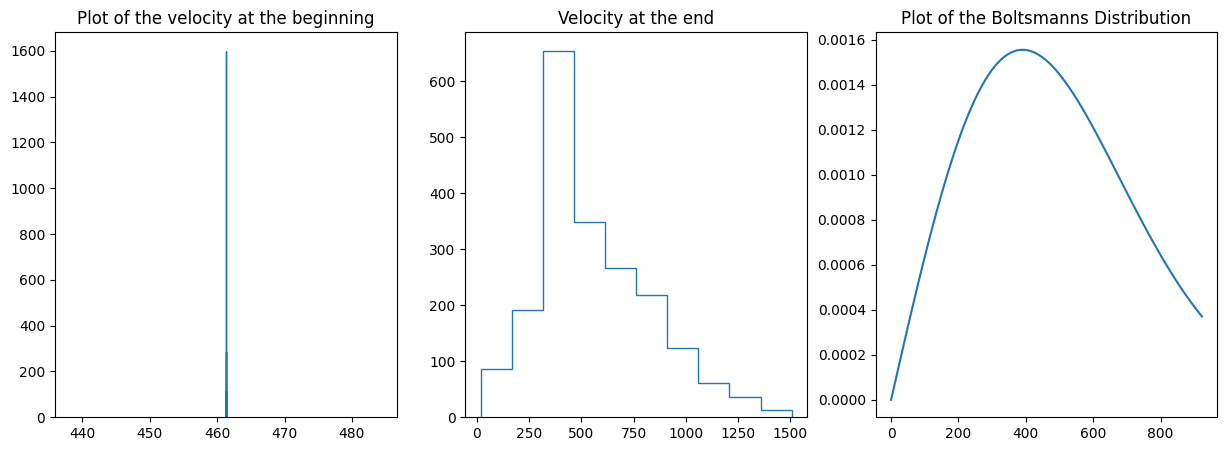

In [ ]:
figure_2m0 = Boltzmann_comparison(vel_start_m0, vel_end_m0, np.linspace(0,mean_velocity*2,100) )
plt.show()

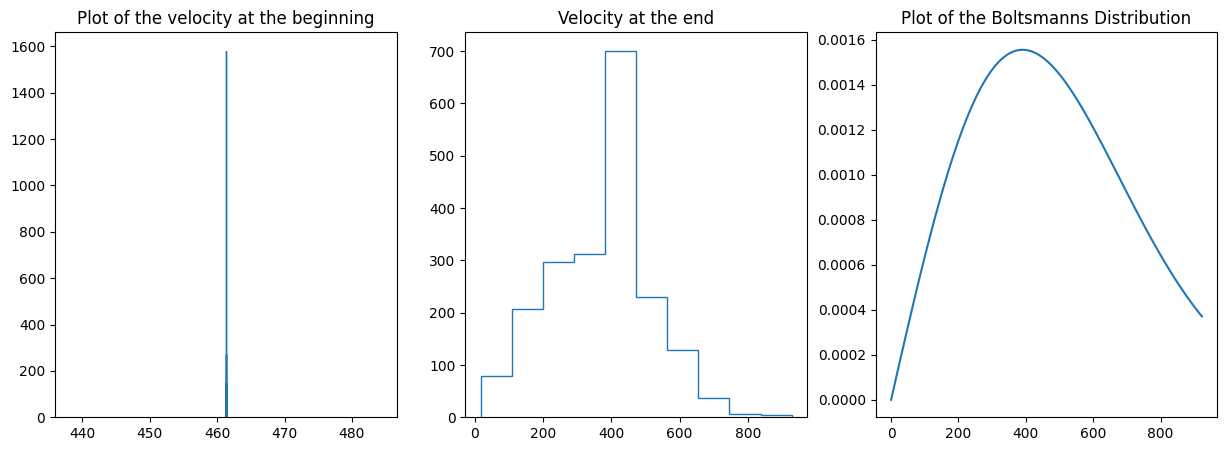

In [ ]:
figure_24m0 = Boltzmann_comparison(vel_start_4m0, vel_end_4m0, np.linspace(0,mean_velocity*2,100) )
plt.show()

**Task 3**



In [ ]:
# Initial Conditions
num_particles =1000
n = num_particles/mol

def van(V):  return (P + a * n**2 / V**2)*( V-n*b) - n*R*T 

sol = optimize.root(van, 10**(-10), method='krylov')
x_b = y_b =  sol.x**(1/3)  #Box boundaries given in meters
mass = [m_02, 4*m_02]
radius = [r_02]

system_3 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)
system_3.uniform_particles()
system_3.find_collisions()

In [ ]:
d_collision = 0.001
number_of_updates = 3000
system_3.elasticity = 1
vel_m0_e_1, vel_4m0_e_1 = Calculating_the_energy(system_3, number_of_updates, d_collision = 0.001)

In [ ]:
d_collision = 0.001
number_of_updates = 3000
system_3.elasticity = 0.9
vel_m0_e_09, vel_4m0_e_09 = Calculating_the_energy(system_3, number_of_updates, d_collision = 0.001)

In [ ]:
d_collision = 0.001
number_of_updates = 3000
system_3.elasticity = 0.8
vel_m0_e_08, vel_4m0_e_08 = Calculating_the_energy(system_3, number_of_updates, d_collision = 0.001)


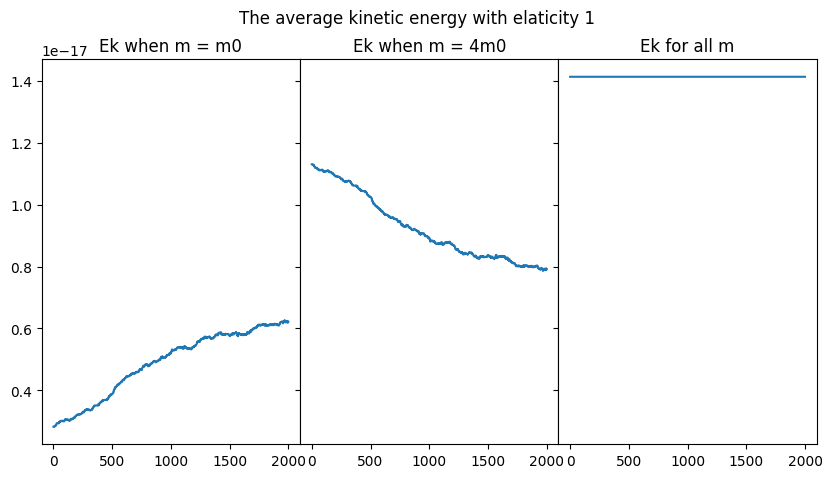

In [ ]:
fig_e_1 = plot_kinetic_energy(vel_m0_e_1,vel_4m0_e_1)
plt.show()

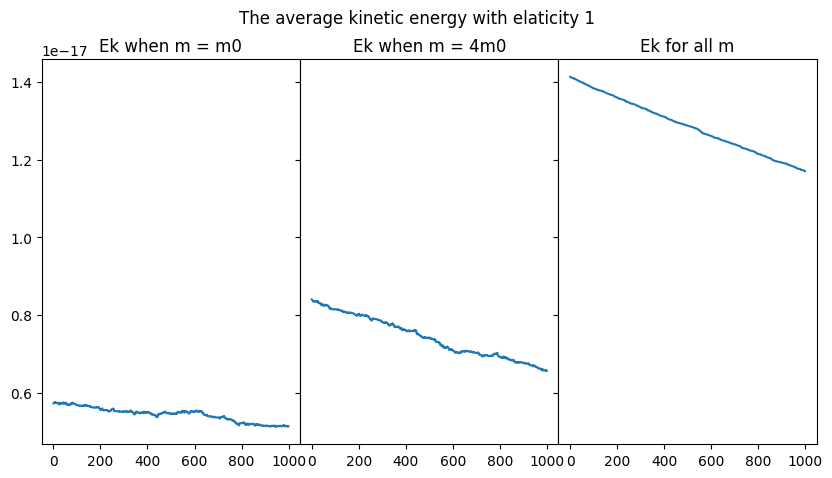

In [ ]:
fig_e_09 = plot_kinetic_energy(vel_m0_e_09,vel_4m0_e_09)
plt.show()

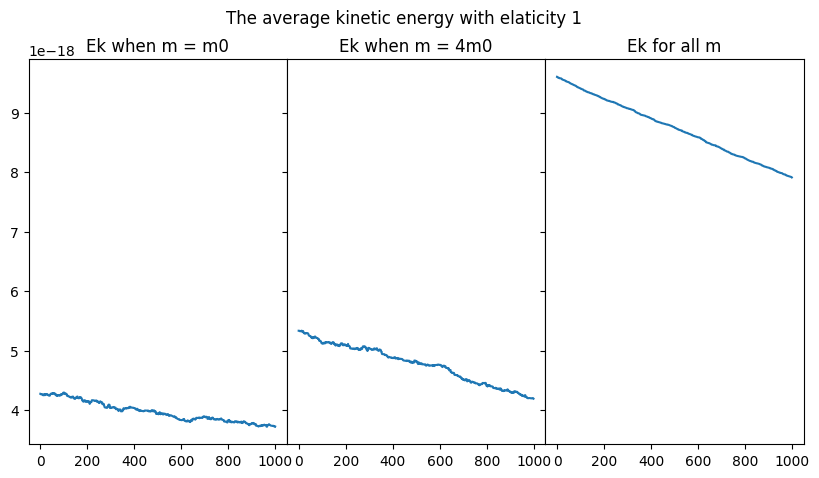

In [ ]:
fig_e_08 = plot_kinetic_energy(vel_m0_e_08,vel_4m0_e_08)
plt.show()

Problem 4:

In [ ]:
num_particles =1000
elasticity= 1
x_boundaries = 1
y_boundaries = 1
mean_velocity = 0 #m/s
mu = 1
mass=[1]
radius=[.0005]
tc = 0
number_of_updates = 1000

system_4 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
projectile = particle(position(0.5,0.75), velocity(0, -5), 5*radius[0], 25* mass[0])
system_4.particles.append(projectile)

system_4.crater()
system_4.find_collisions()

In [ ]:
x_list,y_list,vx_list,vy_list= evolution(system_4,100)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\malan\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\malan\AppData\Local\Temp\ipykernel_11508\2347853873.py", line 1, in <module>
    x_list,y_list,vx_list,vy_list= evolution(system_4,100)
  File "C:\Users\malan\AppData\Local\Temp\ipykernel_11508\1087009178.py", line 22, in evolution
    system_1.update(times)
  File "c:\Users\malan\OneDrive\Dokumenter\8. Semester\Numfy\Numfys\system_class.py", line 226, in update
    def return_velocities(self):
  File "c:\Users\malan\OneDrive\Dokumenter\8. Semester\Numfy\Numfys\system_class.py", line 183, in update_step
  File "c:\Users\malan\OneDrive\Dokumenter\8. Semester\Numfy\Numfys\system_class.py", line 88, in find_collisions_particle
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\

In [ ]:
r_list = []
for p in system_4.particles: 
    r_list.append(p.radius)

In [ ]:
c = ["r"]

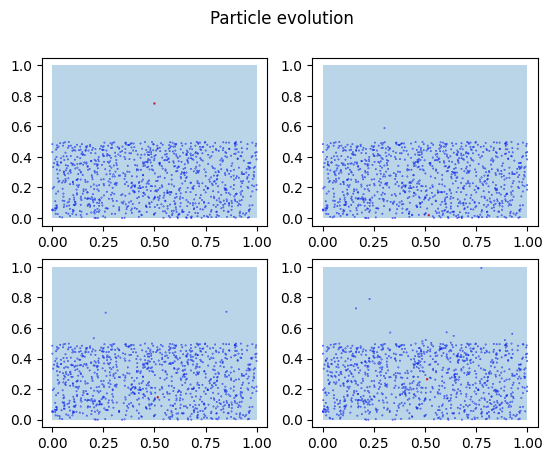

In [ ]:

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.suptitle('Particle evolution')

r_list = np.array(r_list)*100
c_list = ["red"]
for i in range(len(r_list)-1):
    c_list.append("blue")

ax1.scatter(x_list[0], y_list[0], s =r_list , color = c_list)
ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

ax2.scatter(x_list[1], y_list[1],s =r_list, color = c_list)
ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


ax3.scatter(x_list[2], y_list[2],s =r_list, color = c_list)
ax3.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

ax4.scatter(x_list[3], y_list[3],s =r_list, color = c_list)
ax4.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


plt.show()